## Sales Analysis Using Python

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df =pd.read_csv(r"C:\Users\LENOVO.IN\Downloads\python_project\pro_1.csv" ,encoding ="unicode_escape")

In [45]:
df.head(11)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799
10,1003829,Harshita,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770


In [40]:
df.shape #rows column

(11239, 13)

In [47]:
#df.drop(["Status" ,"unnamed1"] , axis=1 ,inplace =True) 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [7]:
pd.isnull(df).sum() #check null value

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace =True) #delete null values

In [9]:
df["Amount"] = df["Amount"] .astype(int) #change the data types

In [10]:
df["Amount"].dtypes

dtype('int32')

##  Start Exploratary Data Analysis (EDA)

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
df.describe()#describe return description of columns lsike(count ,mean ,std)

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
#when i use description for a specific columns
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Age 

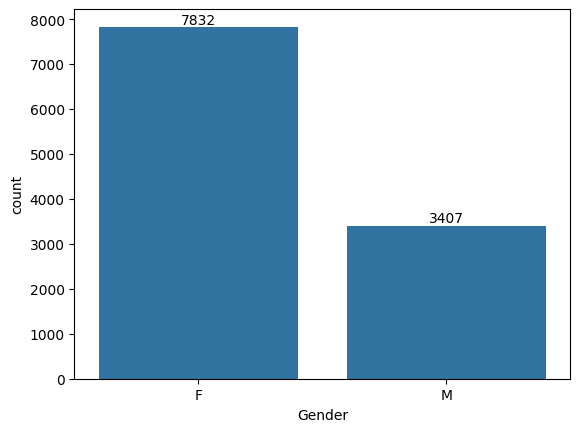

In [15]:
ax = sns.countplot(x = "Gender",data = df)

for bars in ax.containers: 
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

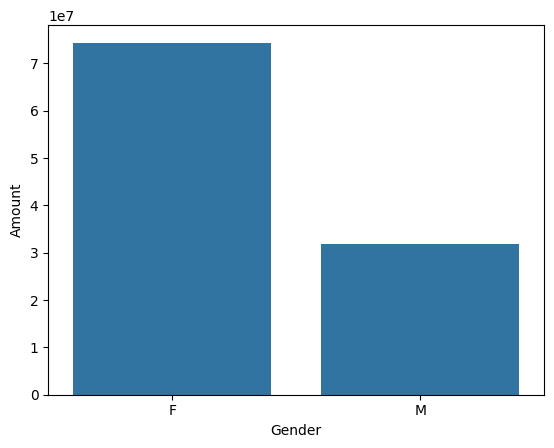

In [16]:
#PURCHASING POWER
sales_gen = df.groupby(["Gender"] ,as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sns.barplot( x= "Gender" ,y= "Amount", data= sales_gen)

### Form the above chart Derived that no of Coustumer is  Female &  Purchasing power is high.

## Age_Group

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

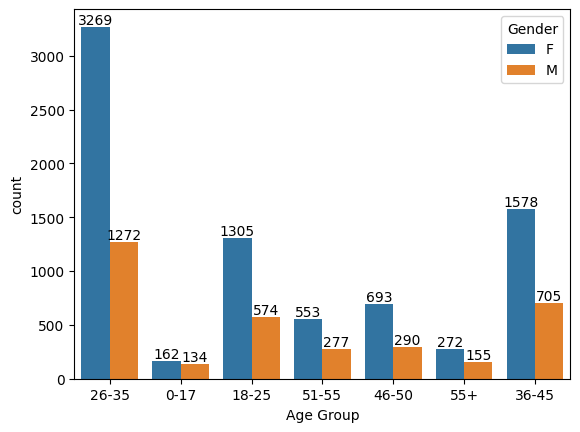

In [18]:
ax = sns.countplot(x = "Age Group",hue ="Gender",data = df)

for bars in ax.containers: 
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

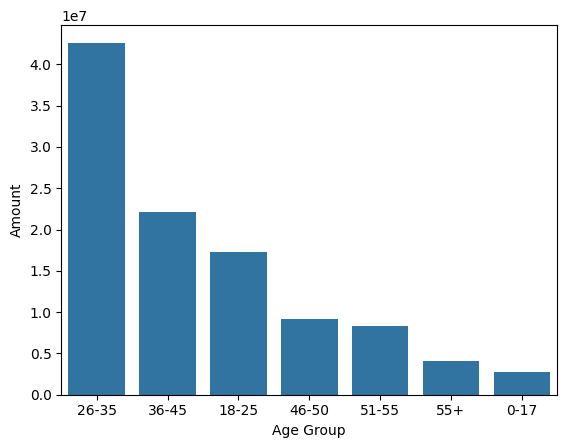

In [19]:
#PURCHASING POWER
sales_age = df.groupby(["Age Group"] ,as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sns.barplot( x = "Age Group" ,y= "Amount", data= sales_age)

### This chart shows as our No. of costumer is lies between (26-35) Age Group and they are females

 ## State

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

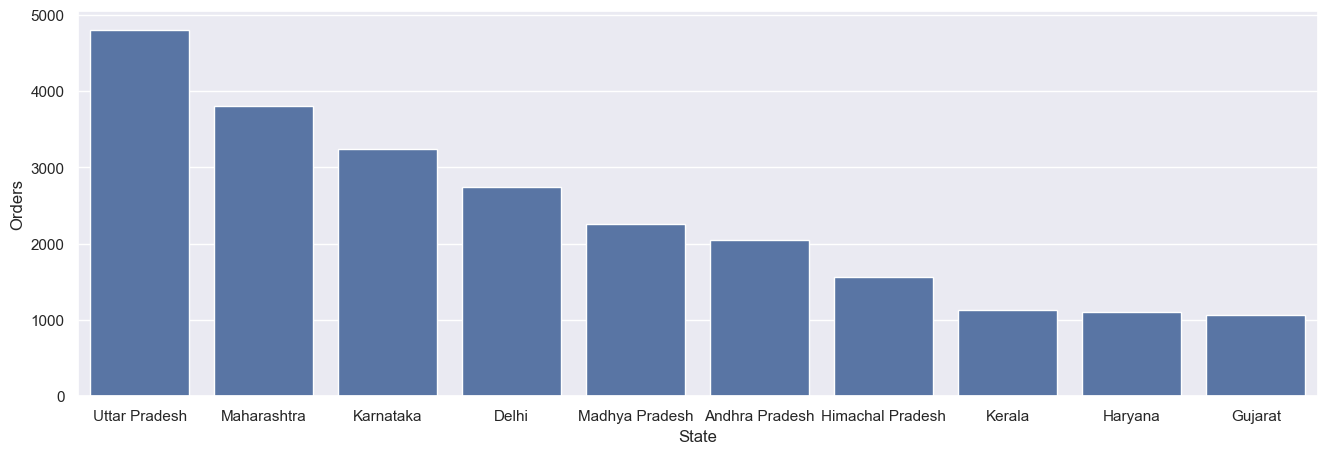

In [21]:
#sales state count number of state
sales_state = df.groupby(["State"] ,as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

sns.set(rc={"figure.figsize": (16, 5)})

sns.barplot( x = "State" ,y= "Orders", data= sales_state)

<Axes: xlabel='State', ylabel='Amount'>

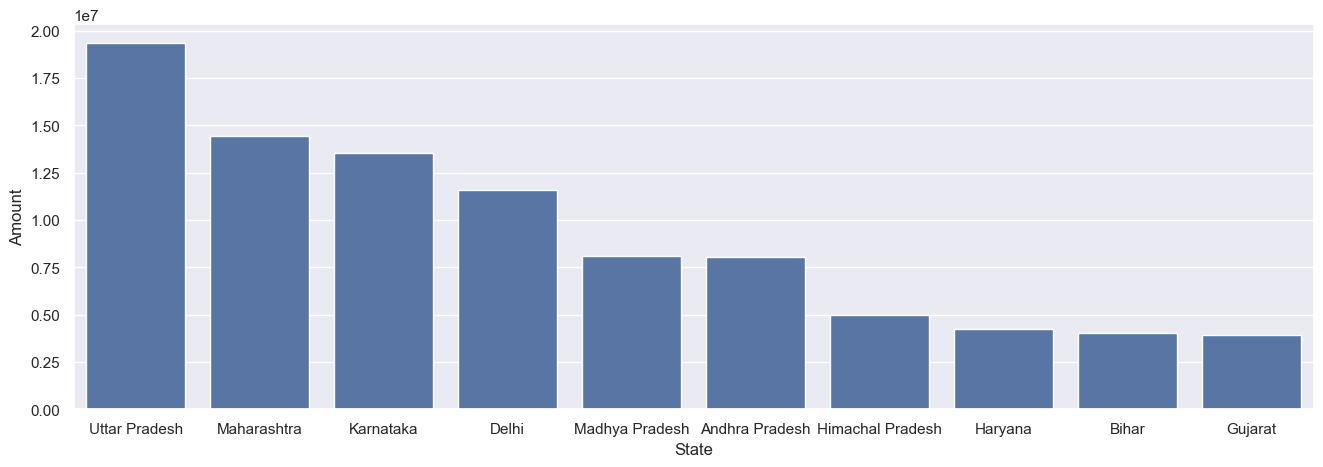

In [22]:
#sales state count number of state
sales_state = df.groupby(["State"] ,as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)

sns.set(rc={"figure.figsize": (16, 5)})

sns.barplot( x = "State" ,y= "Amount", data= sales_state)

#### Our top Performing states Are ( Utter Pradesh , Maharashtra  &  Karnataka) Also they are highest No. of Purchasing Power.

## Marital_Status

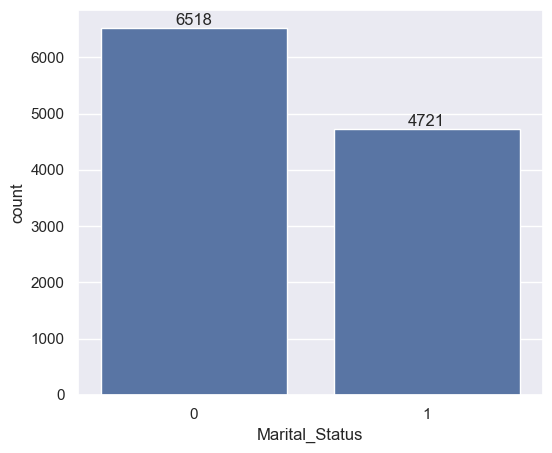

In [34]:
ax = sns.countplot(x = "Marital_Status",data = df)

sns.set(rc={"figure.figsize": (6, 4)})
for bars in ax.containers: 
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

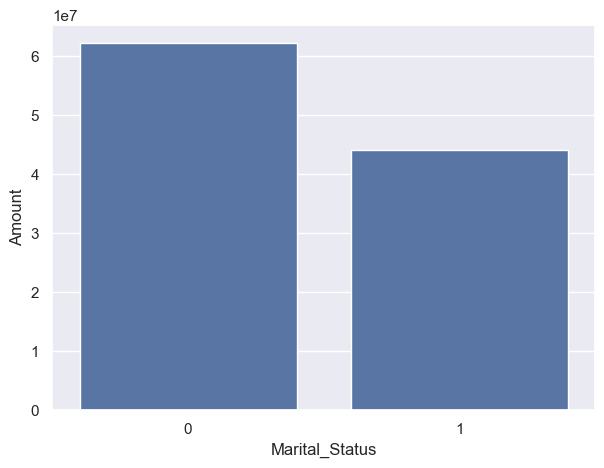

In [24]:
#sales state count number of state
sales_state = df.groupby(["Marital_Status"] ,as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sns.set(rc={"figure.figsize": (7, 5)})

sns.barplot( x = "Marital_Status" ,y= "Amount",data= sales_state)

#### This Chart Shows as Our No. of costumers Are Maried

## Occupation



In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

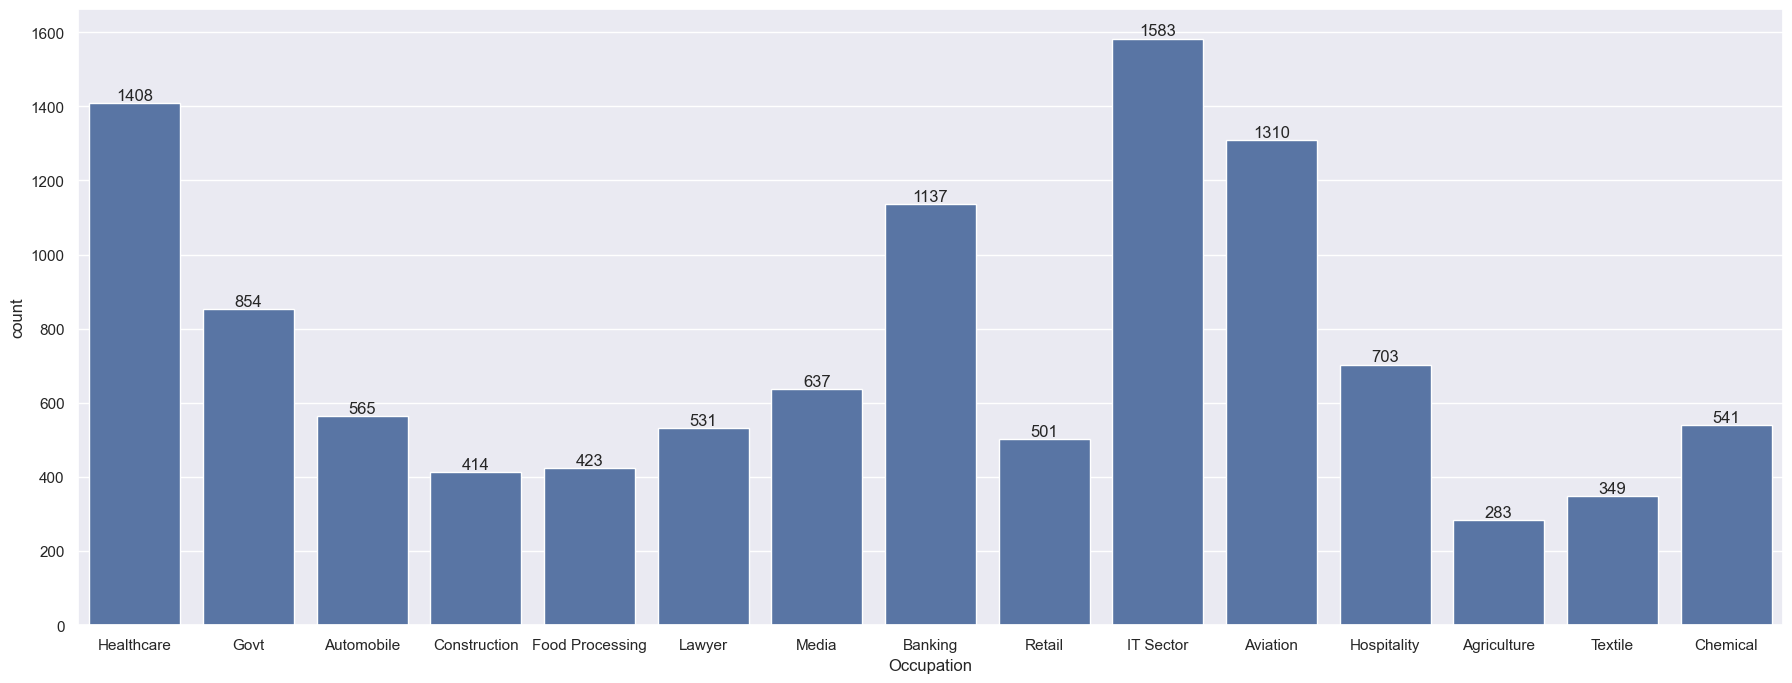

In [36]:
#occupoation
ax = sns.countplot(x = "Occupation",data = df)

sns.set(rc={"figure.figsize": (22, 8)})
for bars in ax.containers: 
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

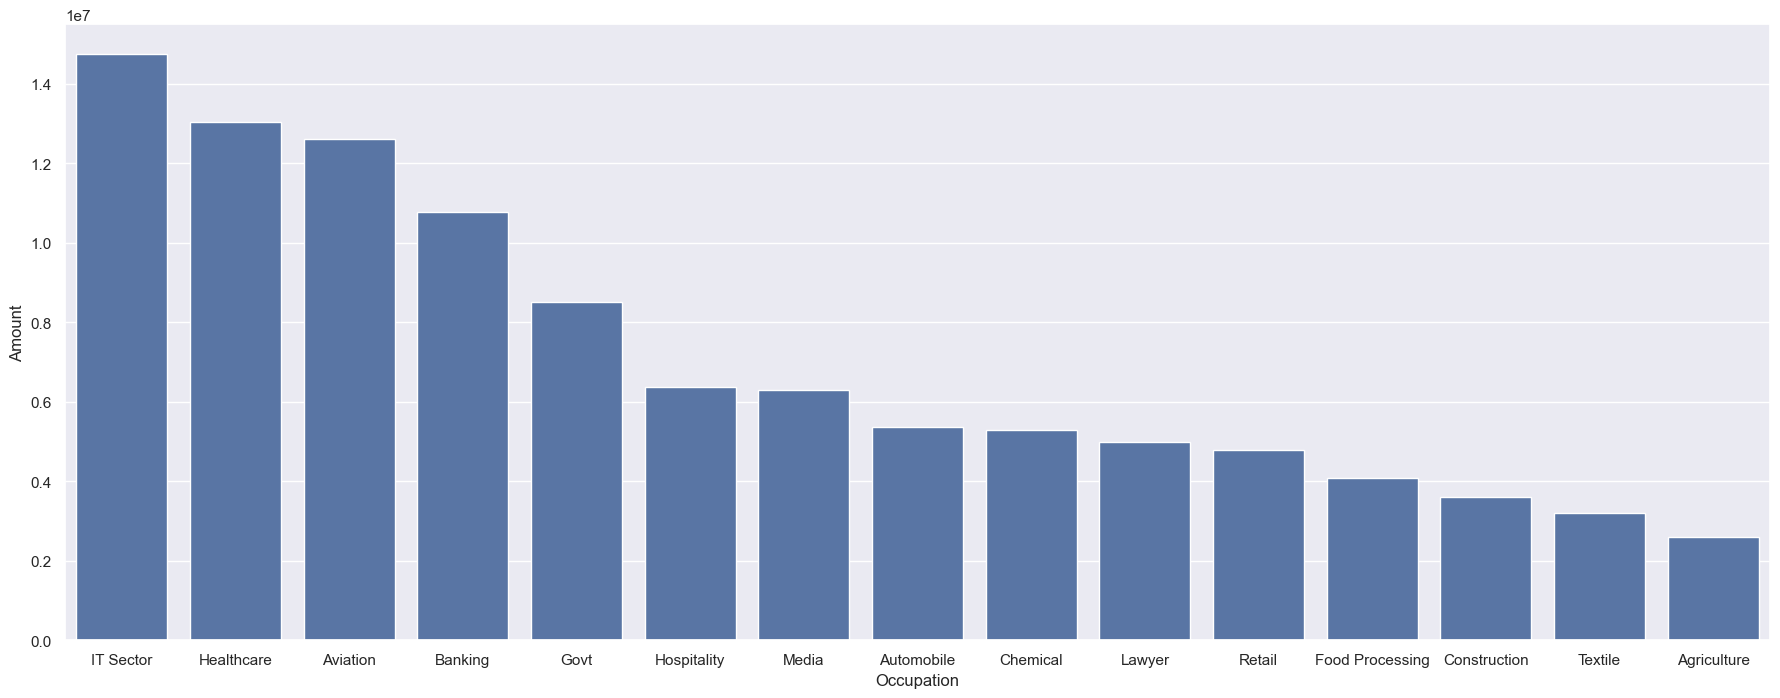

In [27]:
#sales purchasing power
sales_state = df.groupby(["Occupation"] ,as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sns.set(rc={"figure.figsize": (22, 8)})

sns.barplot( x = "Occupation" ,y= "Amount",data= sales_state)

### This Chart Shows as our top Coustumer do jobs in ( IT Secter, Health Care  &  Aviation)

## Produoct_Category

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

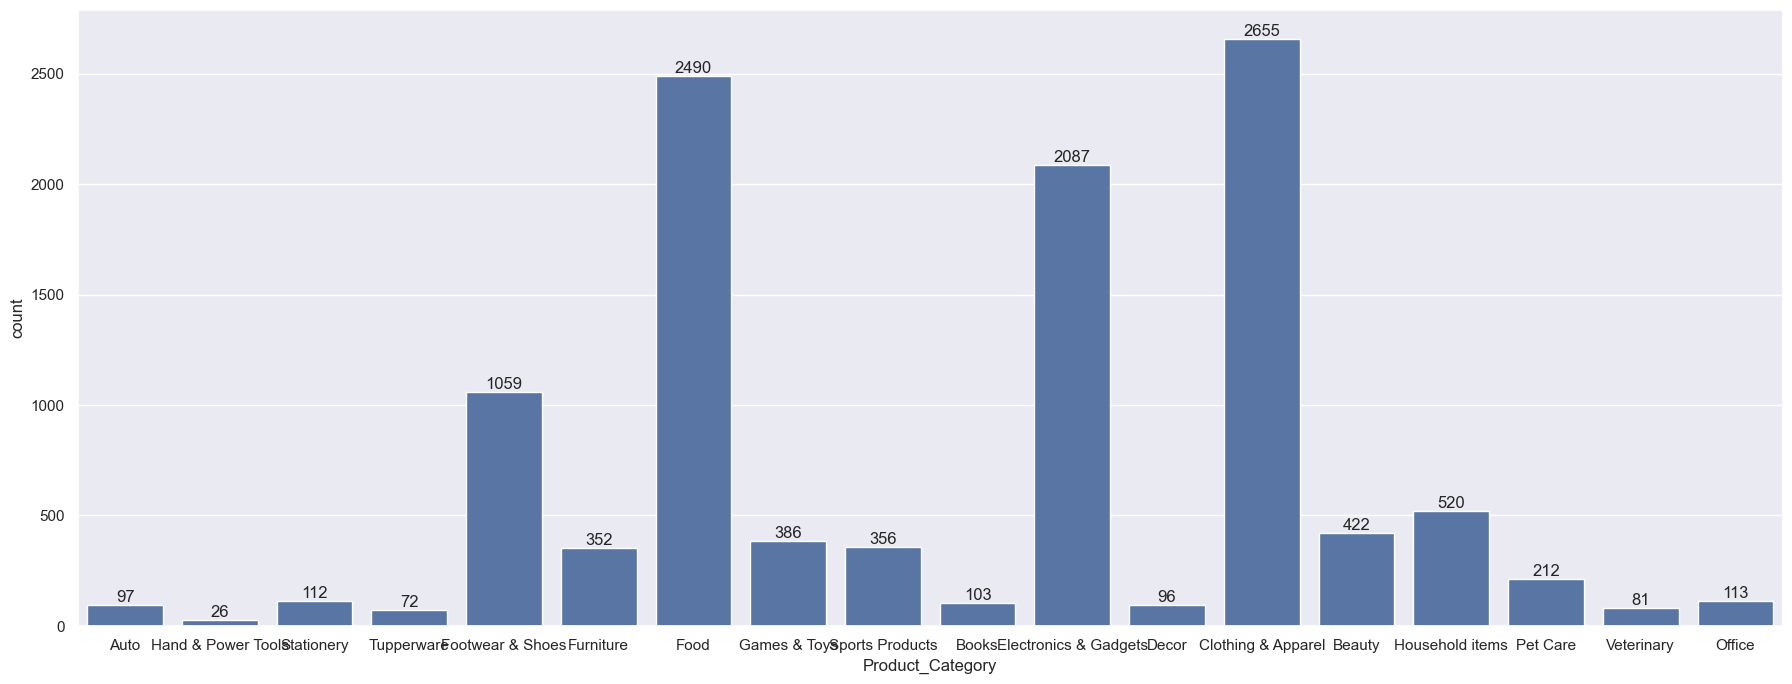

In [29]:
#occupoation
ax = sns.countplot(x = "Product_Category",data = df)

sns.set(rc={"figure.figsize": (20, 5)})
for bars in ax.containers: 
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

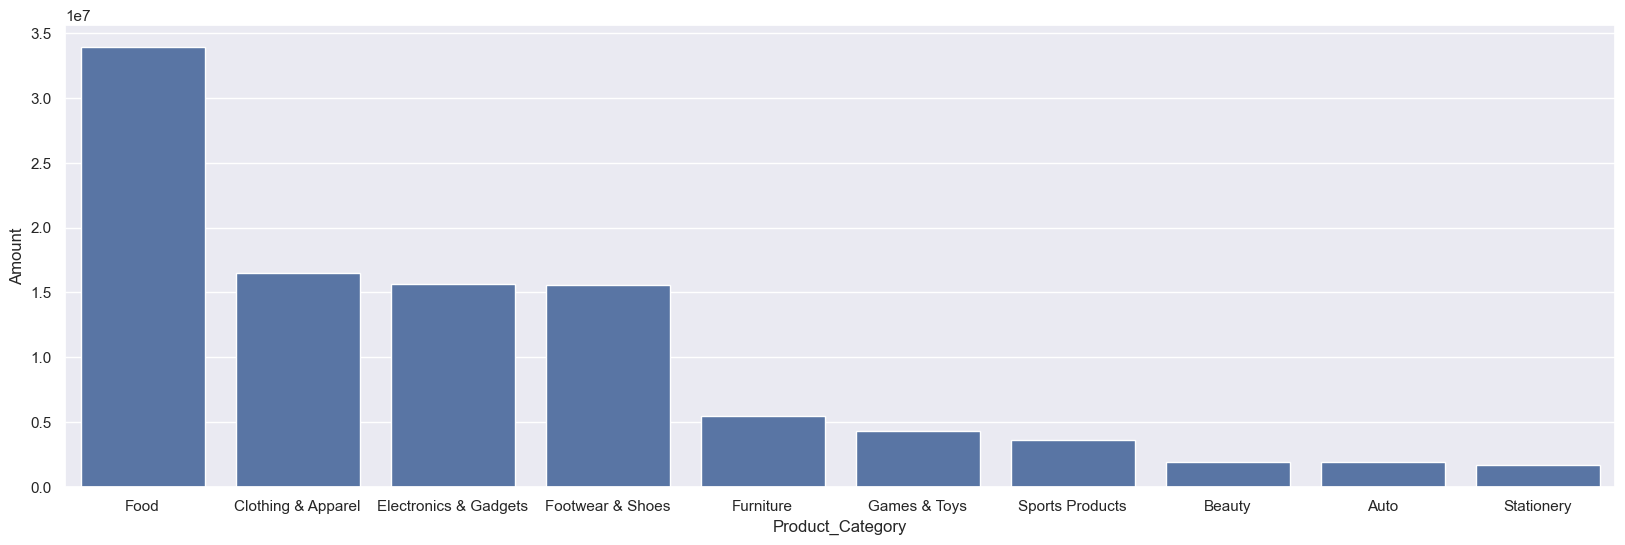

In [32]:
#sales purchasing power
sales_state = df.groupby(["Product_Category"] ,as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)

sns.set(rc={"figure.figsize": (20, 6)})

sns.barplot( x = "Product_Category" ,y= "Amount",data= sales_state)

### Our Top Selling Product's Are  ( Food , Clothing & Electronic Gadgets)

<Axes: xlabel='Product_ID', ylabel='Orders'>

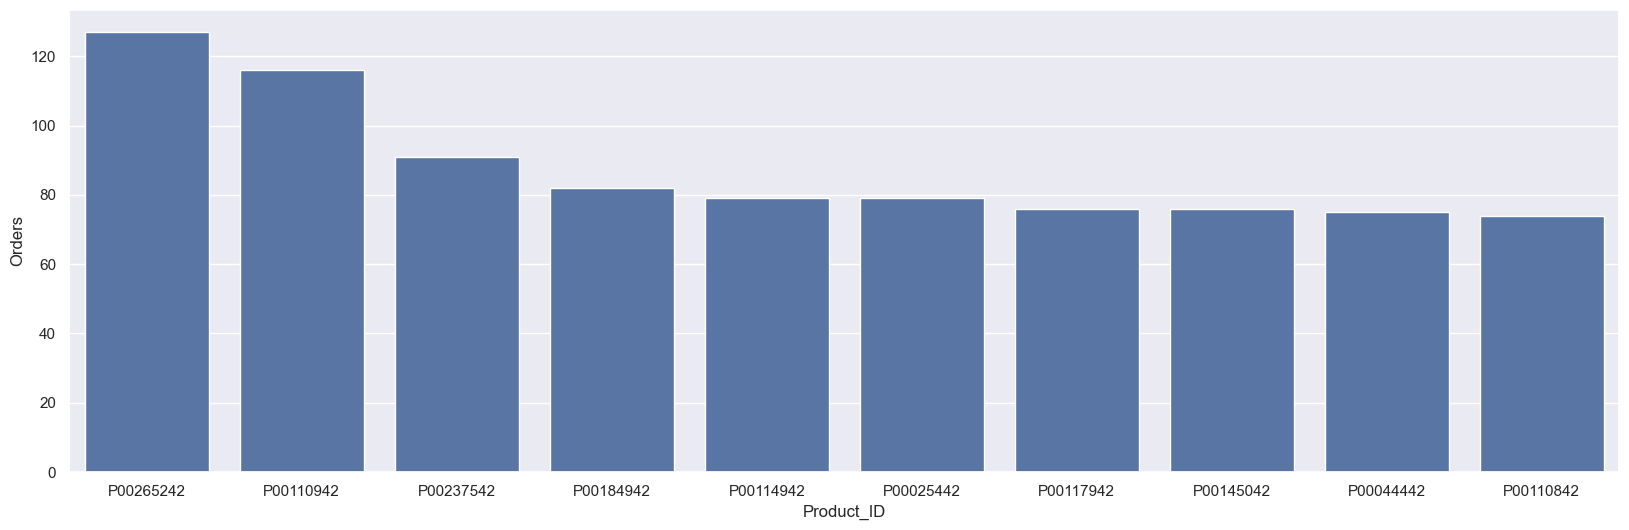

In [38]:
#sales purchasing power
sales_state = df.groupby(["Product_ID"] ,as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

sns.set(rc={"figure.figsize": (20, 6)})

sns.barplot( x = "Product_ID" ,y= "Orders",data= sales_state)

# CONCLUSION
  ###  it's Conclude that Our No. of costumer's are Maried woman which  lies Age Group between 26-35 and do jobs in IT Secter .
  
  ### Our top Performing States areUtter Pradesh , Maharashtra & Karnatak . Top selling Product's Are Food , Clothing & Electronic Gadgets.

### To Improve the Performance we target This Audiance.